## Data Visualization (C)

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Changing the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Reseting the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [4]:
# Importing project data

path = r'C:\Users\efens\cf_tasks\2023-07 Instacard Basket Analysis'
merged_all = pd.read_pickle(os.path.join(path, '02 Data', '022 Prepared Data', 'merged_all.pkl'))

In [5]:
# Checking dataset after import

merged_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days,frequency_flag,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,7.00,196,1,0,Soda,77,7,9.00,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## 01. Creating a histogram of the “order_hour_of_day” column.

In [6]:
# Exploring the variable order_hour_of_day

merged_all['order_hour_of_day'].describe()

count   32404859.00
mean          13.43
std            4.25
min            0.00
25%           10.00
50%           13.00
75%           16.00
max           23.00
Name: order_hour_of_day, dtype: float64

- Unexpected values not found

In [7]:
# Exploring values

merged_all['order_hour_of_day'].value_counts()

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

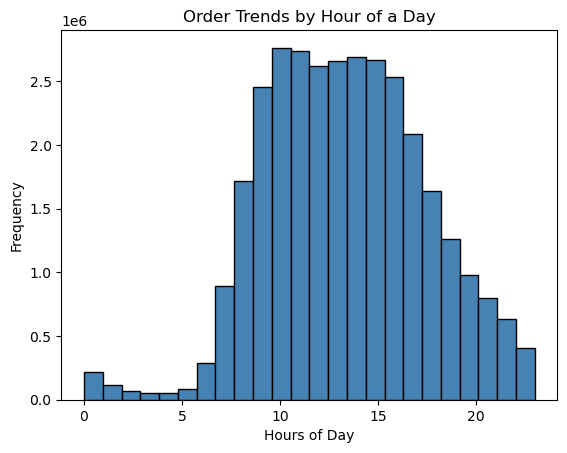

In [8]:
## Creating a detailled histogram

# Data for histogram
data_1 = merged_all['order_hour_of_day']

# Creating a histogram
hist_1 = data_1.plot.hist(bins = 24, color='steelblue', edgecolor='black')

# Adding title and labels to the histogramm

plt.title("Order Trends by Hour of a Day")
plt.xlabel("Hours of Day")
plt.ylabel("Frequency")
                        
# Show the histogram
plt.show()

In [9]:
## Additional calculations

#  Calculating counts for each hour
hour_counts = merged_all['order_hour_of_day'].value_counts()

# Calculate the amount counts for top hours 9-16
sum_counts_top = hour_counts.loc[[9, 10, 11, 12, 13, 14, 15, 16]].sum()

# Print the result

print(sum_counts_top)

21118071


In [10]:
# calculating counts for all orders

total_count = hour_counts.sum()
total_count

32404859

In [11]:
# calculating the percentage

top_counts = ((sum_counts_top)/(hour_counts.sum()))*100
top_counts

65.16945807417338

#### Description 
- The largest number of orders is made during working hours, between 9 a.m. and 4 p.m., and accounts for about 65% of the total number of orders.
- After 18 hours there is a smooth decline.
- At night, from 0 to 5 a.m., the number of orders is minimal.

#### Exporting the histogramm

In [12]:
hist_1.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'hist_hours.png'))

## 02. Creating a bar chart from the “loyalty_flag” column.

In [13]:
# Exploring the variable order_hour_of_day

merged_all['loyalty_flag'].describe()

count             32404859
unique                   3
top       Regular customer
freq              15876776
Name: loyalty_flag, dtype: object

In [14]:
# Exploring counts

merged_all['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

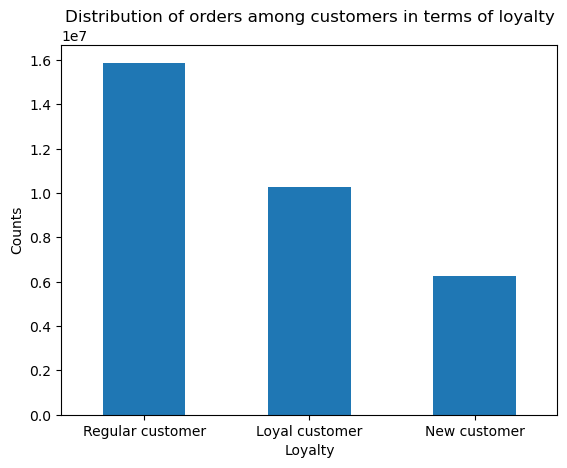

In [15]:
# Creating a bar chart

bar = merged_all['loyalty_flag'].value_counts().plot.bar()

# Adding title and labels to the plot
bar.set_title("Distribution of orders among customers in terms of loyalty")
bar.set_xlabel("Loyalty")
bar.set_ylabel("Counts")

# Change the roration on x-axes
plt.xticks(rotation=0)

# Showing the plot
plt.show()

#### Description

- Regular customers make up the largest proportion of all customers 

#### Exporting the chart

In [16]:
bar.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'bar_loyalty.png'))

## 03. Checking whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [17]:
# Exploring the varibale 'prices'

merged_all['prices'].describe()

count   32404859.00
mean          11.98
std          495.66
min            1.00
25%            4.20
50%            7.40
75%           11.30
max        99999.00
Name: prices, dtype: float64

In [18]:
# Turning the unexpected price values to NaN

merged_all.loc[merged_all['prices'] >100, 'prices'] = np.nan

In [19]:
# Creating a random seeed

np.random.seed(4)

# Creating a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(merged_all)) <= 0.7

In [20]:
# Checking the boolean values

dev

array([False,  True, False, ...,  True,  True,  True])

In [21]:
# Split the dataframe into two samples

big = merged_all[dev] # store 70% of the sample in the df big
small = merged_all[~dev] # store 30% of the sample in the df small

In [22]:
# Calculating the lenght of the whole df

len(merged_all)

32404859

In [23]:
# Reducing the number of columns to the number that is necessary

df_2 = small[['order_hour_of_day','prices']]

In [24]:
merged_all['prices'].max()

25.0

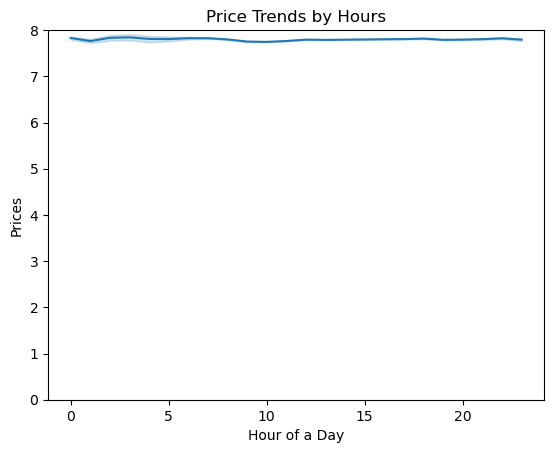

In [25]:
# Creating a line chart 

line_hour_price = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

# Adding title and labels to the line chart

plt.title("Price Trends by Hours")
plt.xlabel("Hour of a Day")
plt.ylabel("Prices")

# Setting the y-axis limits to 0-8
plt.ylim(0, 8)

# Show the histogram
plt.show()

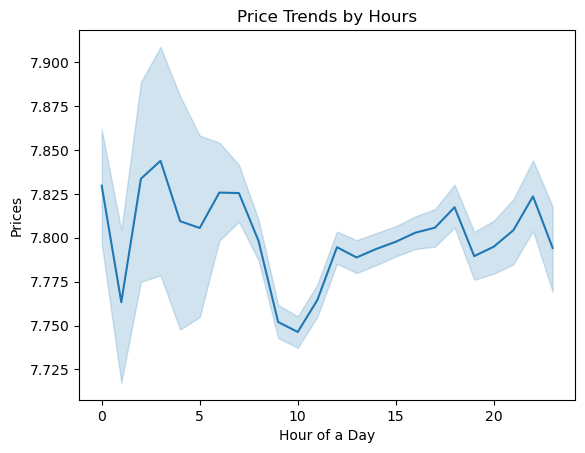

In [26]:
# Creating a detailled line chart 

line_hour_price_1 = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

# Adding title and labels to the line chart

plt.title("Price Trends by Hours")
plt.xlabel("Hour of a Day")
plt.ylabel("Prices")

# Show the histogram
plt.show()

#### Description

- Price volume distributions appear to be stable and do not change much during the day and fluctuate between 7.750 and 7.850.

#### Exporing charts

In [27]:
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'line_hour_price.png'))

In [28]:
line_hour_price_1.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'line_hour_price_1.png'))

## 04. Exploratory analysis of customer demographics

In [29]:
# Looking at the whole dataset

merged_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days,frequency_flag,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,7.00,196,1,0,Soda,77,7,9.00,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [44]:
# Create a separate df for demographic analysis
df_demo = small[['user_id','prices','price_range_loc','loyalty_flag','spenders','gender','state','age','n_dependants','fam_status','income']]

# Check the output
df_demo.head()

,user_id,prices,price_range_loc,loyalty_flag,spenders,gender,state,age,n_dependants,fam_status,income
0,1,9.00,Mid-range product,New customer,Low spender,Female,Alabama,31,3,married,40423
2,1,9.00,Mid-range product,New customer,Low spender,Female,Alabama,31,3,married,40423
3,1,9.00,Mid-range product,New customer,Low spender,Female,Alabama,31,3,married,40423
6,1,9.00,Mid-range product,New customer,Low spender,Female,Alabama,31,3,married,40423
10,1,12.50,Mid-range product,New customer,Low spender,Female,Alabama,31,3,married,40423


#### 01: Connection between age and family situation

- creating a line chart exploring the connections between age and number of dependents

In [37]:
# Exploring the variables number of dependents and age groups

df_demo[['age','n_dependants']].describe()

,age,n_dependants
count,9721098.00,9721098.00
mean,49.46,1.50
std,18.49,1.12
min,18.00,0.00
25%,33.00,1.00
50%,49.00,2.00
75%,65.00,3.00
max,81.00,3.00


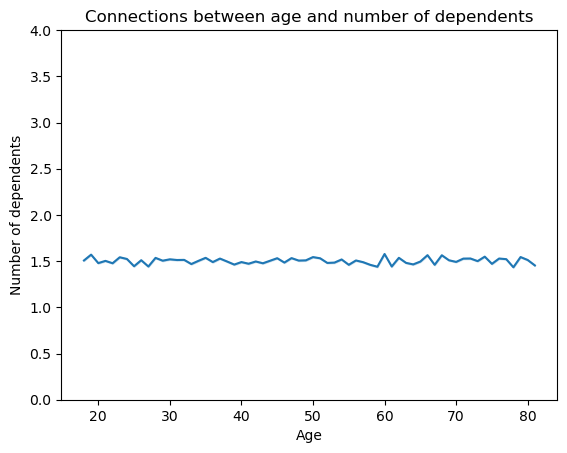

In [38]:
# Creating a detailled line chart 

line_age_depend = sns.lineplot(data = df_demo, x = 'age',y = 'n_dependants')

# Setting the y-axis limits to 0-4
plt.ylim(0, 4)

# Adding title and labels to the line chart

plt.title("Connections between age and number of dependents")
plt.xlabel("Age")
plt.ylabel("Number of dependents")


# Change the roration on x-axes
plt.xticks(rotation=0)

# Show the histogram
plt.show()

In [42]:
# Calculation of correlation between variables number of dependents and age

corr_age_n_dep = df_demo['age'].corr(df_demo['n_dependants'])
print("Correlation between age and number of dependents:", corr_age_n_dep)

Correlation between age and number of dependents: -0.0002531725792682872


#### Description

- No correlation between variables number of dependents and age groups was found(r=-0.00025)
- There is no relationship between age and number of dependents

In [48]:
# Exporting line chart

line_age_depend.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'line_age_depend.png'))

#### 02: Testing other possible correlation

In [47]:
# Calculation of correlation between variables

corr_age_income = df_demo['age'].corr(df_demo['income'])
corr_age_prices = df_demo['age'].corr(df_demo['prices'])
corr_income_prices = df_demo['income'].corr(df_demo['prices'])

print("Correlation between age and income:", corr_age_income)
print("Correlation between age and product prices:", corr_age_prices)
print("Correlation between cusomers income and product prices:", corr_age_prices)

Correlation between age and income: 0.41736162324679454
Correlation between age and product prices: 0.0007538112837887954
Correlation between cusomers income and product prices: 0.0007538112837887954


- A small correlation between age and income of the customers was found (r=0.42).

## 05. Connection between age and spending power (income)

In [49]:
# Check the ouliers where the price is above 100$
df_demo.loc[df_demo['prices'] > 100]

# Turning the unexpected values to NaN
df_demo.loc[df_demo['prices'] >100, 'prices'] = np.nan

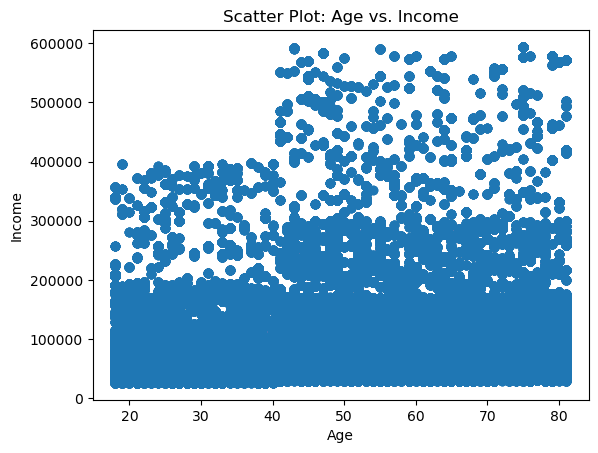

In [59]:
# Creating a scatterplot without outliers
scatter_age_income = plt.scatter(df_demo['age'], df_demo['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot: Age vs. Income')
plt.show()

# Show the histogram
plt.show()

#### Description

- Based on visualisation, an increase in income after the age of 40 has been identified (based on the maximum values from 400,000 to 600,000) 

In [61]:
# Exporting scatterplot

scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'scatter_age_income.png'))